## Further Cleaning, EDA, Feature Engineering and Linear Regression Models

In [1]:
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
import seaborn as sns
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 950)
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler

In [2]:
def checkresiduals(df, target, sm_model):
    # checking for our model - Homoscedasticity,  Independence of residuals
    pred_val = sm_model.fittedvalues.copy()
    true_val = df[target].values.copy()
    residual = true_val - pred_val

    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
#     fig, ax = plt.subplots(figsize=(8, 6))
    ax1.hist(residual, density=True, bins=30)
    ax2.scatter(df[target],residual)
    ax2.set_title('Residual Scatterplot')
    plt.show()

In [12]:
# import cleaned data in the json files 

In [3]:
df1 = pd.read_json('cleaned_json/cars_data_full_v2.json')
df2 = pd.read_json('cleaned_json/cars_data_full_v2_2059.json')

In [4]:
# drop data that was deemed not useful or too complicated to incorporate in the model

In [5]:
df1.drop(['stock','interior_color','trim','vin'], axis=1, inplace = True)
df2.drop(['stock','interior_color','vin'], axis=1, inplace = True)

In [6]:
# Concat the two dataframes into one and reset index

In [7]:
dfs = [df1, df2]
df = pd.concat(dfs)
df = df.reset_index()

In [8]:
df.shape

(3055, 14)

In [9]:
# Drop outliers where price is over $80,000
df = df[df['price']<80000]
# Drop the one car with mpg under 80- this also gets rid of the NaN values
df = df[df['city_mpg']<80]
# determine the row index of a car with a 'Not provided' milage to be dropped from the table
notgiven = df[df['mileage']=='Not provided'].index
df.drop(notgiven, inplace = True)
# create age of car based on 2019
df['yr_old'] =  df['year'].map(lambda x: 2019-x)
# checking all milage is turned into integers
df['mileage'] = df['mileage'].astype(int)
# dropping column of old index resulting from concating the two data frames from the previous step
df.drop(['index'], axis=1, inplace = True)
# Drop outliers with 0 highway mpg
dfzero = df[df['highway_mpg']==0].index
df.drop(dfzero, inplace = True)

In [14]:
columns = ['city_mpg', 'highway_mpg', 'mileage', 'yr_old']

In [15]:
n = 4
row_groups= [columns[i:i+n] for i in range(0, len(columns), n) ]
row_groups

[['city_mpg', 'highway_mpg', 'mileage', 'yr_old']]

In [17]:
# Two additonal variables were introduced which were: 
# 1. the cars that are considered to be luxury cars as a binary variable.
# 2. and the cars that are considered to be low mileage <= 7,500mi as a binary variable.

In [18]:
luxury = ['Mercedes-Benz', 'BMW', 'Lexus', 'Acura', 'Audi', 'INFINITI', 'Cadillac', 'Land Rover', 'Volvo', 'Lincoln', 'Maserati', 'Alfa Romeo', 'Porsche', 'Jaguar']
df['luxury'] = np.where(df['make'].isin(luxury), 1, 0)
df['low_mileage']= np.where(df['mileage']<=7500, 1, 0)

In [19]:
# checking number of cars considered to be of low mileage
df.low_mileage.value_counts()

0    2571
1     106
Name: low_mileage, dtype: int64

In [20]:
# checking for NaN objects- none are found for relevant variables
df.isna().sum()

brand               0
city_mpg            0
drivetrain        113
engine             92
exterior_color     20
fuel_type           0
highway_mpg         0
make                0
mileage             0
model              37
price               0
transmission       22
year                0
yr_old              0
luxury              0
low_mileage         0
dtype: int64

In [21]:
# creating converting data into log for future
df['price_log'] = np.log(df['price'])

Checking different model coefficents, p-values and R-squared values in order to determine what is the best model to use. This will be done by setting the target value as 'price' with various variable combinations.

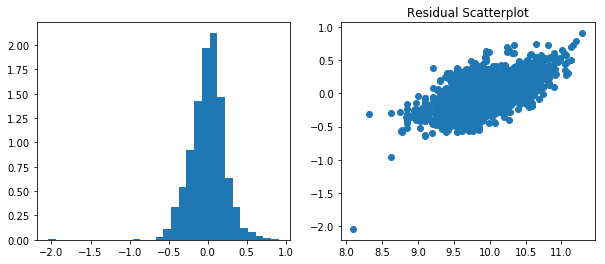

In [70]:
checkresiduals(df, 'price_log', price_log_lux_low_model)

In [71]:
def model1(x):
    x = np.array(x)
    coeff = np.array([-5.449e-06, 0.0044, 0.0133, -0.0489, -0.0569, 0.3272])
    y = 11.3940+(np.sum(np.multiply(x, coeff)))
    return round(np.exp(y),0), "Expected resale value in USD"

## Linear Regression Model

Cars consdiered to be luxury:
Mercedes-Benz, BMW, Lexus, Acura, Audi, INFINITI, Cadillac, Land Rover, Volvo, Lincoln, Maserati, Alfa Romeo, Porsche and Jaguar.

In [67]:
ins = input("""Enter the parameters in the order shown below separated by commas 
                        1. Max mileage(integer),
                        2. required city_mpg(integer), 
                        3. required highway_mpg, 
                        4. year (2018-2014 only),
                        5. luxury brand? (if yes enter 1 otherwise 0)""")

Enter the parameters in the order show below separated by comma 
                        1. Max mileage(integer),
                        2. required city_mpg(integer), 
                        3. required highway_mpg, 
                        4. year (2018-2014 only),
                        5. luxury brand? (if yes enter 1 otherwise 0)10000, 20, 18, 2015, 0


In [73]:
x = ins.split(",")
x.insert(1, 'replace me!')
x[0] = int(x[0])
x[1] = 1 if x[0] <= 7500 else 0
x[2] = int(x[2])
x[3] = int(x[3])
x[4] = 2019 - int(x[4])
x[5] = int(x[5])

In [74]:
model1(x)

(36232.0, 'Expected resale value in USD')